# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
# merged_data

In [43]:
# Checking the number of mice.
unique_mice_count = len(merged_data["Mouse ID"].unique())
unique_mice_count

249

In [44]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [45]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_data[merged_data["Mouse ID"] =="g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.loc[merged_data["Mouse ID"].isin(duplicate_mouse) == False]
cleaned_data

# cleaned_data = merged_data.loc[merged_data["Mouse ID"].isin(duplicate_mouse) == False]
# cleaned_data
# cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
# cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [52]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count_cleaned = len(cleaned_data["Mouse ID"].unique())
unique_mice_count_cleaned

248

## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group the cleaned data by Drug Regimen
grouped_data = cleaned_data.groupby("Drug Regimen")

# Calculate summary statistics for tumor volume
summary_statistics = grouped_data["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Rename columns for clarity
summary_statistics = summary_statistics.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std.Dev",
    "sem": "Tumor Volume Std.Err."
})

# Display the summary statistics
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [54]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)


# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_sl = cleaned_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})
summary_statistics_sl

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

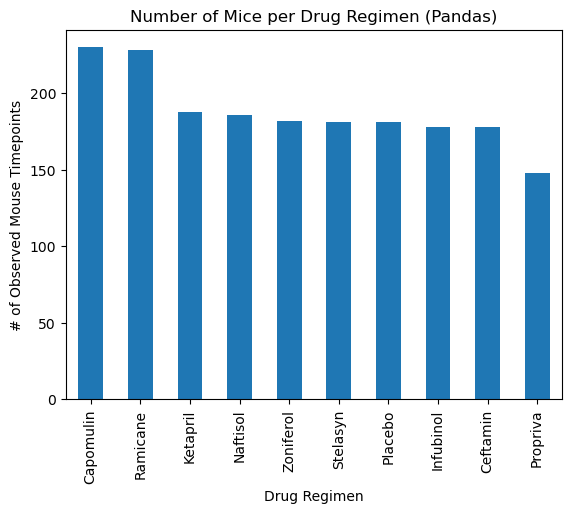

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Create a DataFrame to count the number of mice per drug regimen
mice_count_by_regimen = cleaned_data["Drug Regimen"].value_counts()

# Create a bar plot using Pandas
mice_count_by_regimen.plot(kind="bar", title="Number of Mice per Drug Regimen (Pandas)")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

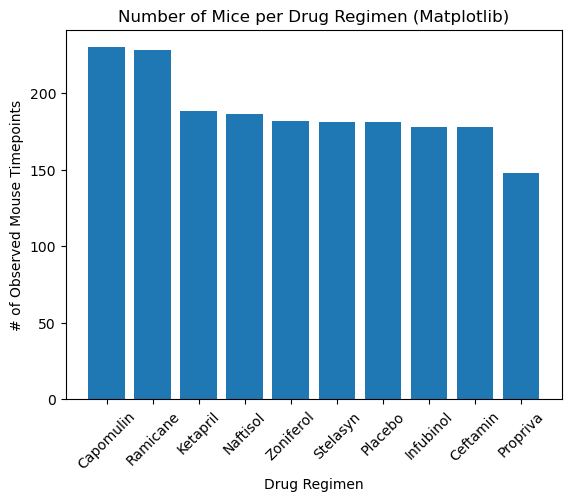

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mice_count_by_regimen.index, mice_count_by_regimen.values)
plt.title("Number of Mice per Drug Regimen (Matplotlib)")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)
plt.show()

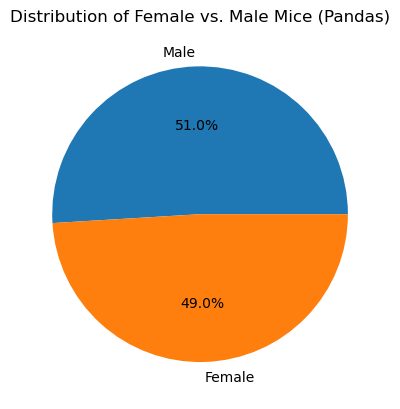

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Create a DataFrame to count the distribution of female versus male mice
gender_distribution = cleaned_data.Sex.value_counts()

# Create a pie plot using Pandas
gender_distribution.plot(kind="pie", autopct='%1.1f%%', title="Distribution of Female vs. Male Mice (Pandas)")
plt.ylabel("")
plt.show()

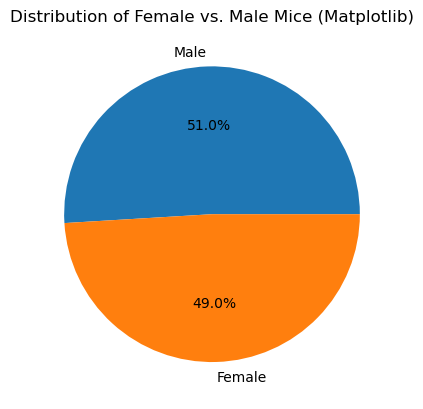

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create a pie plot using Matplotlib's pyplot
plt.pie(gender_distribution.values, labels=gender_distribution.index, autopct='%1.1f%%')
plt.title("Distribution of Female vs. Male Mice (Matplotlib)")
plt.show()

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse
final_timepoint_df = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()
final_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_final_timepoint_df=final_timepoint_df.merge(cleaned_data, on=["Mouse ID", "Timepoint"], how="left")

In [61]:
# Put treatments into a list for for loop (and later for plot labels)

# List of promising treatment regimens
promising_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


    
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in promising_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_data = merge_final_timepoint_df.loc[merge_final_timepoint_df["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_data.append(regimen_data)
    
    # Determine outliers using upper and lower bounds
    quantiles = regimen_data.quantile([0.25,0.5,0.75])
    lowerq = quantiles[0.25]
    upperq = quantiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers {outliers}")

Capomulin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


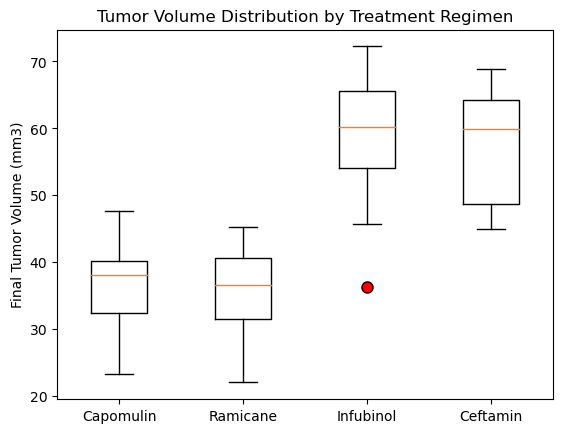

In [62]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=promising_regimens, flierprops=dict(marker="o", markersize=8, markerfacecolor="red", markeredgecolor="black"))
plt.title("Tumor Volume Distribution by Treatment Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

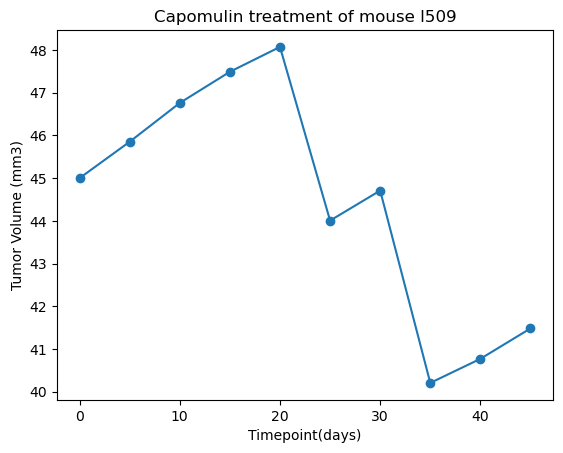

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
mouse_data=capomulin_mouse[capomulin_mouse["Mouse ID"] == "l509"]

# Generate a line plot of tumor volume vs. time point for the selected mouse
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o')
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
# plt.grid(True)
plt.show()

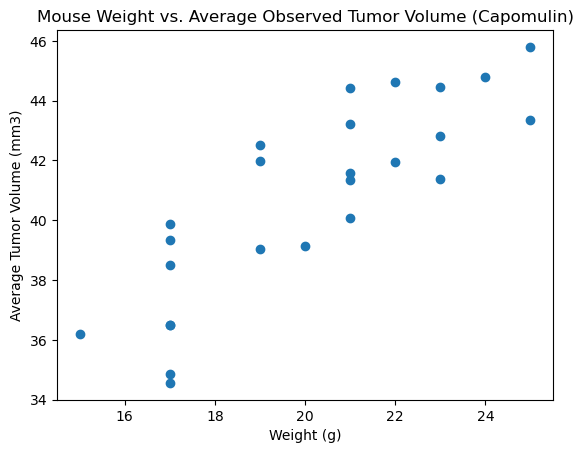

In [64]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Group the data by Mouse ID and calculate the average observed tumor volume and mouse weight
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
avg_tumor_volume_weight = capomulin_data.groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean()

# Generate a scatter plot
plt.scatter(avg_tumor_volume_weight["Weight (g)"], avg_tumor_volume_weight["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs. Average Observed Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
# plt.grid(True)
plt.show()

## Correlation and Regression

Correlation between Weight and Tumor Volume: 0.84


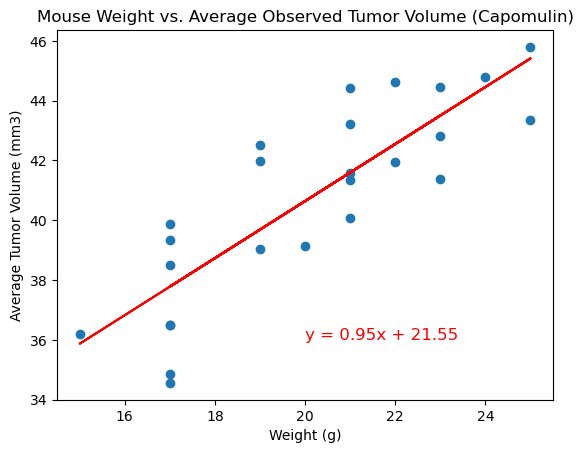

In [67]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient between mouse weight and average tumor volume
# correlation = round(st.pearsonr(avg_tumor_volume_weight["Weight (g)"], avg_tumor_volume_weight["Tumor Volume (mm3)"])[0], 2)

# correlation = st.pearsonr(avg_tumor_volume_weight["Weight (g)"], avg_tumor_volume_weight["Tumor Volume (mm3)"])
print(f"Correlation between Weight and Tumor Volume: {correlation}")

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_volume_weight["Weight (g)"], avg_tumor_volume_weight["Tumor Volume (mm3)"])

# Create a regression line equation
regression_line = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Generate the scatter plot with the regression line
plt.scatter(avg_tumor_volume_weight["Weight (g)"], avg_tumor_volume_weight["Tumor Volume (mm3)"])
plt.plot(avg_tumor_volume_weight["Weight (g)"], slope * avg_tumor_volume_weight["Weight (g)"] + intercept, color='red')
plt.title("Mouse Weight vs. Average Observed Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(regression_line, (20, 36), fontsize=12, color='red')
# plt.grid(True)
plt.show()
